In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction?select=Medicalpremium.csv
data = pd.read_csv("../data/Medicalpremium.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
data.sample(4)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
916,63,1,1,0,0,163,66,0,0,1,25000
695,43,0,0,0,1,170,96,1,0,1,30000
850,48,1,0,0,0,153,74,1,1,1,31000
286,66,1,1,0,0,157,62,1,0,1,35000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [6]:
data.quantile([0.1, 0.2,0.5,0.6,0.8,0.9,0.95,0.99,1]).T # review for outliers

,0.10,0.20,0.50,0.60,0.80,0.90,0.95,0.99,1.00
Age,22.0,27.0,42.0,46.0,56.0,62.0,64.0,66.0,66.0
Diabetes,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
BloodPressureProblems,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
AnyTransplants,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AnyChronicDiseases,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Height,154.0,159.0,168.0,172.0,178.0,182.0,184.0,186.0,188.0
Weight,59.0,65.0,75.0,79.0,89.0,95.0,99.0,121.0,132.0
KnownAllergies,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
HistoryOfCancerInFamily,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
NumberOfMajorSurgeries,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0


In [7]:
data.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


<Axes: >

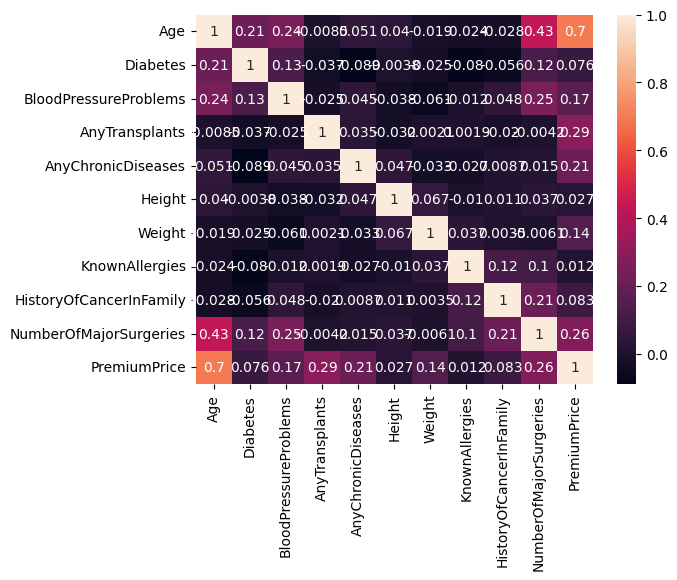

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
y = data[["PremiumPrice"]]
X = data.drop("PremiumPrice", axis=1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [12]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
37,58,0,1,0,1,147,61,0,0,1
688,46,1,1,0,0,184,74,1,0,1
151,47,0,0,0,0,169,116,0,0,1
283,66,0,1,0,0,159,73,0,0,1
84,46,1,0,0,0,152,56,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,32,0,1,0,0,157,58,0,0,1
118,66,1,0,0,0,169,55,0,0,0
701,49,1,1,0,1,164,60,0,0,2
206,31,1,1,0,0,174,114,0,0,1


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
print("mae: ", mean_absolute_error(y_test, preds_lr))
print("mse: ", mean_squared_error(y_test, preds_lr))
print("rmse: ", np.sqrt(mean_squared_error(y_test, preds_lr)))
print("r2: ", r2_score(y_test, preds_lr))

mae:  2572.8330466919756
mse:  11230013.423710253
rmse:  3351.121218892306
r2:  0.6795481354858283


In [20]:
lr.score(X,y)

0.6413557665700393

In [21]:
svr = SVR()
svr.fit(X_train, y_train)
preds_svr = svr.predict(X_test)
print("mae: ", mean_absolute_error(y_test, preds_svr))
print("mse: ", mean_squared_error(y_test, preds_svr))
print("rmse: ", np.sqrt(mean_squared_error(y_test, preds_svr)))
print("r2: ", r2_score(y_test, preds_svr))

mae:  4696.072716354482
mse:  35556437.039190724
rmse:  5962.921854191175
r2:  -0.014613795619573544


In [22]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
preds_dt = dt.predict(X_test)
print("mae: ", mean_absolute_error(y_test, preds_dt))
print("mse: ", mean_squared_error(y_test, preds_dt))
print("rmse: ", np.sqrt(mean_squared_error(y_test, preds_dt)))
print("r2: ", r2_score(y_test, preds_dt))

mae:  873.7373737373738
mse:  12924242.424242424
rmse:  3595.0302396840034
r2:  0.6312027932631524
